In [1]:
import folium
import pandas as pd
import json
import requests
import numpy as np

# 숙제

전라남도의 인구와 전라북도의 인구수를 시각화 하라.

In [5]:
global_dict = json.loads(requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json').text)
local_dict = json.loads(requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-municipalities-2018-geo.json').text)

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv')
df1 = df.rename(columns = {'행정구역(시군구)별': 'key','총인구수 (명)':'value'}).copy()
df1

key     value
0     서울특별시   9532428
1     부산광역시   3356311
2     대구광역시   2390721
3     인천광역시   2945009
4     광주광역시   1442454
5     대전광역시   1454228
6     울산광역시   1122566
7   세종특별자치시    368276
8       경기도  13549577
9       강원도   1537717
10     충청북도   1596948
11     충청남도   2118977
12     전라북도   1789770
13     전라남도   1834653
14     경상북도   2627925
15     경상남도   3318161
16  제주특별자치도    676569

In [15]:
df1.iloc[list(map(lambda x : "전라" in x, df1.key)),:]

key    value
12  전라북도  1789770
13  전라남도  1834653

In [7]:
df2 = df1.query('key == "전라북도" or key == "전라남도"')

In [8]:
global_dict2 = global_dict.copy()

In [9]:
features__ = [global_dict['features'][i] for i in range(17) if  global_dict['features'][i]['properties']['name'] == "전라북도" or global_dict['features'][i]['properties']['name'] =="전라남도"]

In [10]:
global_dict2['features'] = features__

In [11]:
m = folium.Map(
    location = [36, 128],
    zoom_start = 7,
    scrollWheelZoom = False
)

folium.Choropleth(
    geo_data = global_dict2,
    data = df2 ,
    columns = ['key','value'],
    key_on = 'properties.name'
).add_to(m)
m

In [14]:
"전라" in "전라북도"

True

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

In [12]:
df.stack().stack().reset_index()

AIRLINE  WEEKDAY level_2    level_3            0
0        AA        1    mean  CANCELLED     0.032106
1        AA        1    mean   DIVERTED     0.004699
2        AA        1   count  CANCELLED  1277.000000
3        AA        1   count   DIVERTED  1277.000000
4        AA        2    mean  CANCELLED     0.007341
..      ...      ...     ...        ...          ...
387      WN        6   count   DIVERTED   987.000000
388      WN        7    mean  CANCELLED     0.006066
389      WN        7    mean   DIVERTED     0.002600
390      WN        7   count  CANCELLED  1154.000000
391      WN        7   count   DIVERTED  1154.000000

[392 rows x 5 columns]

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')\
.query('Nationality=="Korea Republic" or Nationality=="Japan"')\
[['Nationality','Overall','Age']].reset_index(drop=True)
df

Nationality  Overall  Age
0    Korea Republic       89   28
1             Japan       77   28
2             Japan       73   28
3    Korea Republic       72   31
4             Japan       71   28
..              ...      ...  ...
456           Japan       59   21
457  Korea Republic       60   21
458           Japan       54   17
459  Korea Republic       51   20
460  Korea Republic       58   25

[461 rows x 3 columns]

In [15]:
df.groupby('Nationality').agg({'Overall':'mean'}).reset_index()

Nationality    Overall
0           Japan  66.478873
1  Korea Republic  65.457627

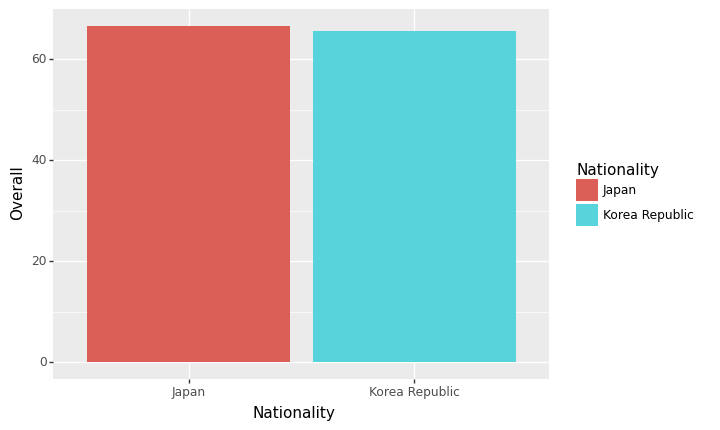

<ggplot: (169725452090)>

In [17]:
ggplot(df.groupby('Nationality').agg({'Overall':'mean'}).reset_index())\
+geom_col(aes(x='Nationality',y='Overall', fill= 'Nationality'))

In [18]:
df.groupby('Nationality').agg({'Age':'mean'}).reset_index()

Nationality        Age
0           Japan  26.084507
1  Korea Republic  27.158192

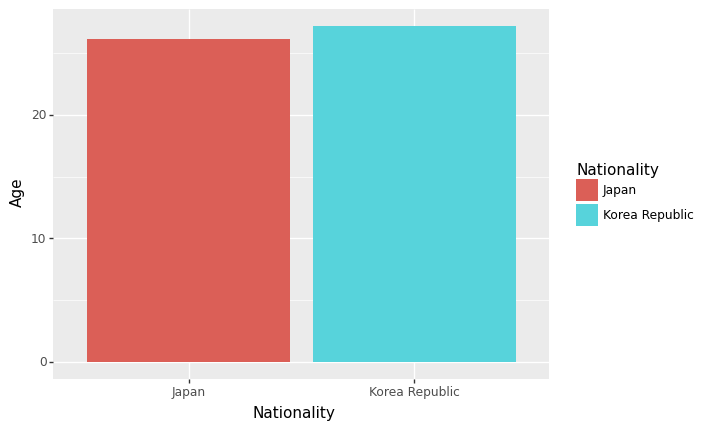

<ggplot: (169725673804)>

In [19]:
ggplot(df.groupby('Nationality').agg({'Age':'mean'}).reset_index())\
+ geom_col(aes(x='Nationality',y='Age',fill = 'Nationality'))

In [22]:
df.groupby('Nationality').agg({'Age':'mean','Overall':'mean'}).melt(ignore_index = False).reset_index()

Nationality variable      value
0           Japan      Age  26.084507
1  Korea Republic      Age  27.158192
2           Japan  Overall  66.478873
3  Korea Republic  Overall  65.457627

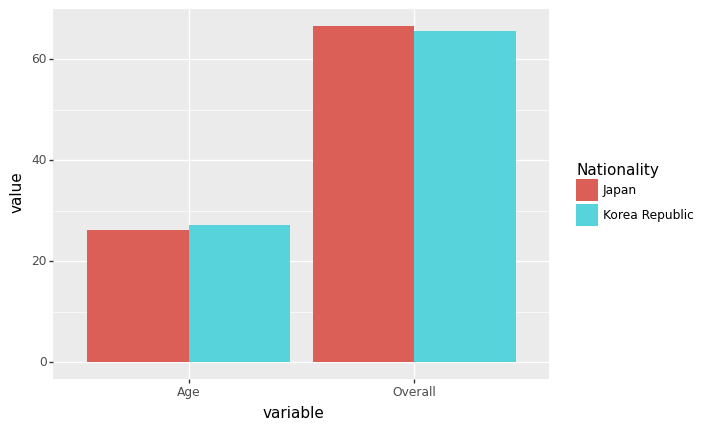

<ggplot: (169725628438)>

In [23]:
ggplot(df.groupby('Nationality').agg({'Age':'mean','Overall':'mean'}).melt(ignore_index = False).reset_index())\
+ geom_col(aes(x='variable',y='value',fill = 'Nationality'),position = 'dodge')

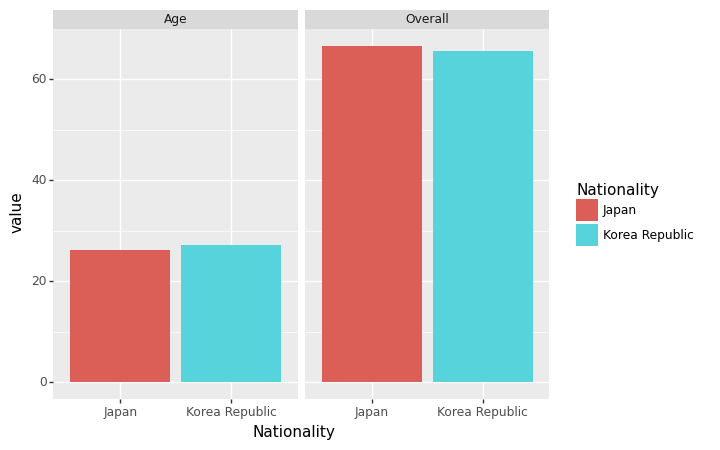

<ggplot: (169725692504)>

In [25]:
ggplot(df.groupby('Nationality').agg({'Age':'mean','Overall':'mean'}).melt(ignore_index = False).reset_index())\
+ geom_col(aes(x='Nationality',y='value',fill = 'Nationality'),position = 'dodge')\
+ facet_wrap('variable')

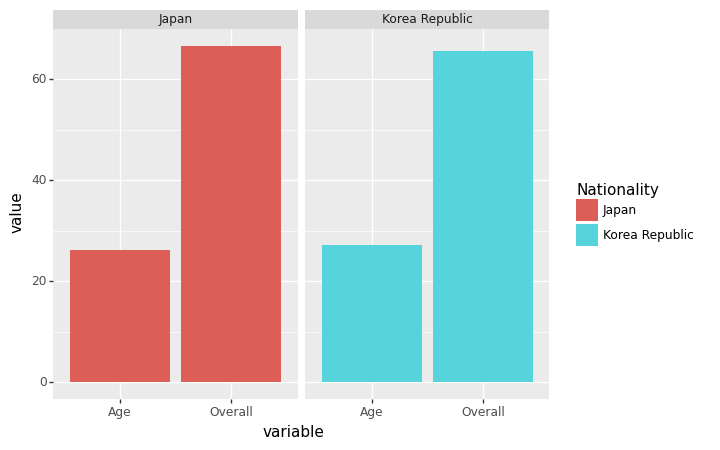

<ggplot: (169725635512)>

In [26]:
ggplot(df.groupby('Nationality').agg({'Age':'mean','Overall':'mean'}).melt(ignore_index = False).reset_index())\
+ geom_col(aes(x='variable',y='value',fill = 'Nationality'),position = 'dodge')\
+ facet_wrap('Nationality')

In [34]:
df.groupby('Nationality').agg({'Age':'mean','Overall':['max','mean']}).melt(ignore_index = False).reset_index()

Nationality variable_0 variable_1      value
0           Japan        Age       mean  26.084507
1  Korea Republic        Age       mean  27.158192
2           Japan    Overall        max  79.000000
3  Korea Republic    Overall        max  89.000000
4           Japan    Overall       mean  66.478873
5  Korea Republic    Overall       mean  65.457627

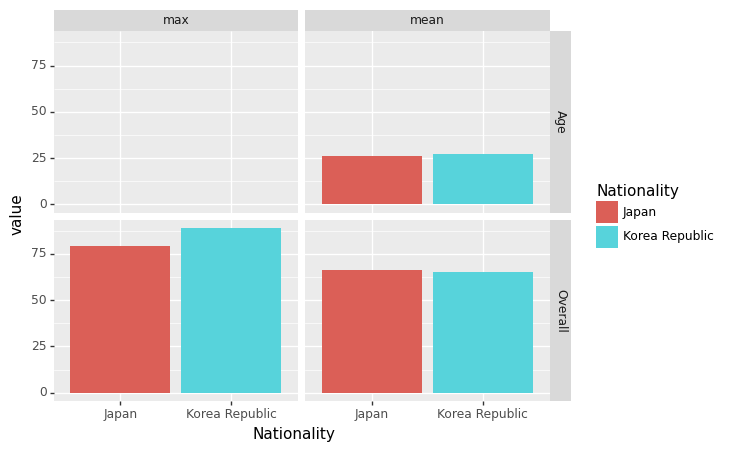

<ggplot: (169725604542)>

In [33]:
ggplot(df.groupby('Nationality').agg({'Age':'mean','Overall':['mean','max']}).melt(ignore_index = False).reset_index())\
+ geom_col(aes(x='Nationality',y= 'value',fill = 'Nationality'))\
+ facet_grid('variable_0 ~ variable_1')

In [36]:
df.groupby('Nationality').agg({'Overall':'count'}).reset_index()

Nationality  Overall
0           Japan      284
1  Korea Republic      177

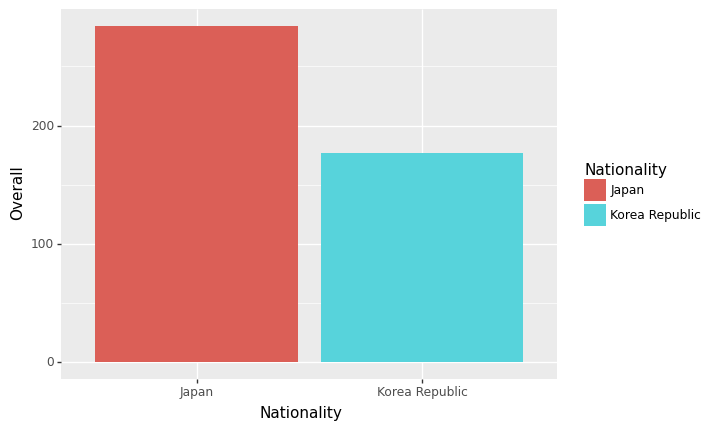

<ggplot: (169728605841)>

In [37]:
ggplot(df.groupby('Nationality').agg({'Overall':'count'}).reset_index())\
+ geom_col(aes(x='Nationality',y='Overall',fill = 'Nationality'))

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0              1       5            4                       0   62506  ...   
1              5       3            3                       0  104437  ...   
2              5       5            3                       0   64955  ...   
3              1       5            3                       0   64991  ...   
4              5       5            3                       0   50825  ...   
..           ...     ...          ...                     ...     ...  ...   
306            1       5            3                       0   65893  ...   
307            5       5            1                       0   48513  ...   
308            1       3            4                       0  220450  ...   
309            1       3            3                       0   89292  ...   
310            1       5            3                       0   45046  ...   

        ManagerName  ManagerID  RecruitmentSource PerformanceScore  \
0    Michael Albert       22.0           LinkedIn          Exceeds   
1        Simon Roup        4.0             Indeed      Fully Meets   
2    Kissy Sullivan       20.0           LinkedIn      Fully Meets   
3      Elijiah Gray       16.0             Indeed      Fully Meets   
4    Webster Butler       39.0      Google Search      Fully Meets   
..              ...        ...                ...              ...   
306  Kissy Sullivan       20.0           LinkedIn      Fully Meets   
307  Brannon Miller       12.0      Google Search              PIP   
308      Janet King        2.0  Employee Referral          Exceeds   
309      Simon Roup        4.0  Employee Referral      Fully Meets   
310   David Stanley       14.0           LinkedIn      Fully Meets   

     EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0                4.60               5                    0   
1                4.96               3                    6   
2                3.02               3                    0   
3                4.84               5                    0   
4                5.00               4                    0   
..                ...             ...                  ...   
306              4.07               4                    0   
307              3.20               2                    0   
308              4.60               5                    6   
309              5.00               3                    5   
310              4.50               5                    0   

    LastPerformanceReview_Date DaysLateLast30 Absences  
0                    1/17/2019              0        1  
1                    2/24/2016              0       17  
2                    5/15/2012              0        3  
3                     1/3/2019              0       15  
4                     2/1/2016              0        2  
..                         ...            ...      ...  
306                  2/28/2019              0       13  
307                   9/2/2015              5        4  
308                  2/21/2019             

In [41]:
df.groupby('Sex').agg({'Salary':'mean'}).reset_index()

Sex        Salary
0   F  67786.727273
1  M   70629.400000

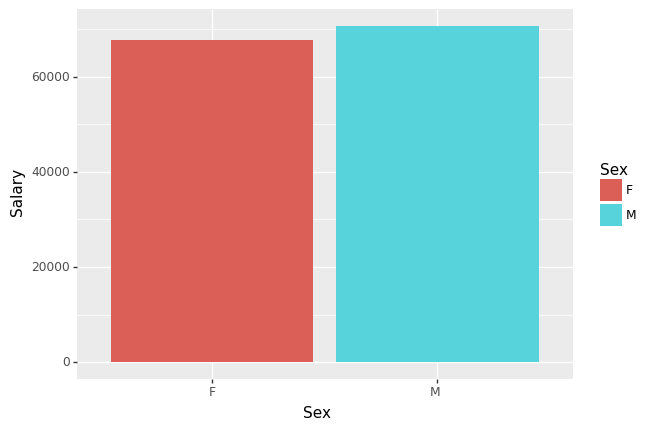

<ggplot: (169728745906)>

In [44]:
ggplot(df.groupby('Sex').agg({'Salary':'mean'}).reset_index())\
+ geom_col(aes(x='Sex',y='Salary',fill = 'Sex'))

In [46]:
df.groupby(['Sex','RaceDesc']).agg({'Salary':'mean'}).melt(ignore_index = False).reset_index()

Sex                          RaceDesc variable         value
0    F  American Indian or Alaska Native   Salary  63436.500000
1    F                             Asian   Salary  67520.117647
2    F         Black or African American   Salary  66963.829787
3    F                 Two or more races   Salary  58068.500000
4    F                             White   Salary  68846.519231
5   M   American Indian or Alaska Native   Salary  70545.000000
6   M                              Asian   Salary  69939.416667
7   M          Black or African American   Salary  85066.121212
8   M                           Hispanic   Salary  83667.000000
9   M                  Two or more races   Salary  62313.800000
10  M                              White   Salary  65334.132530

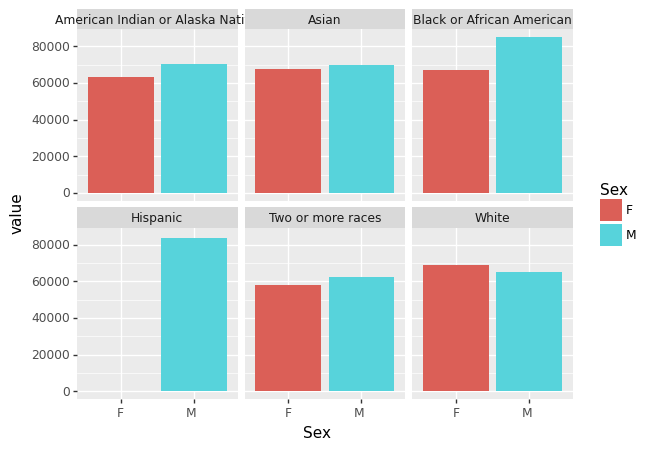

<ggplot: (169728634778)>

In [48]:
ggplot(df.groupby(['Sex','RaceDesc']).agg({'Salary':'mean'}).melt(ignore_index = False).reset_index())\
+ geom_col(aes(x='Sex',y='value',fill='Sex'))\
+ facet_wrap('RaceDesc')

In [53]:
df.groupby(['Sex','RaceDesc']).agg({'Salary':'mean'}).melt(ignore_index = False).reset_index().set_axis(['성','인종','변수','값'],axis=1)

성                                인종      변수             값
0    F  American Indian or Alaska Native  Salary  63436.500000
1    F                             Asian  Salary  67520.117647
2    F         Black or African American  Salary  66963.829787
3    F                 Two or more races  Salary  58068.500000
4    F                             White  Salary  68846.519231
5   M   American Indian or Alaska Native  Salary  70545.000000
6   M                              Asian  Salary  69939.416667
7   M          Black or African American  Salary  85066.121212
8   M                           Hispanic  Salary  83667.000000
9   M                  Two or more races  Salary  62313.800000
10  M                              White  Salary  65334.132530

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

Date  Samsung  Apple  Huawei  Xiaomi  Oppo  Mobicel  Motorola    LG  \
0   2019-10    31.49  22.09   10.02    7.79  4.10     3.15      2.41  2.40   
1   2019-11    31.36  22.90   10.18    8.16  4.42     3.41      2.40  2.40   
2   2019-12    31.37  24.79    9.95    7.73  4.23     3.19      2.50  2.54   
3   2020-01    31.29  24.76   10.61    8.10  4.25     3.02      2.42  2.40   
4   2020-02    30.91  25.89   10.98    7.80  4.31     2.89      2.36  2.34   
5   2020-03    30.80  27.03   10.70    7.70  4.30     2.87      2.35  2.28   
6   2020-04    30.41  28.79   10.28    7.60  4.20     2.75      2.51  2.28   
7   2020-05    30.18  26.72   10.39    8.36  4.70     3.12      2.46  2.19   
8   2020-06    31.06  25.26   10.69    8.55  4.65     3.18      2.57  2.11   
9   2020-07    30.95  24.82   10.75    8.94  4.69     3.46      2.45  2.03   
10  2020-08    31.04  25.15   10.73    8.90  4.69     3.38      2.39  1.96   
11  2020-09    30.57  24.98   10.58    9.49  4.94     3.50      2.27  1.88   
12  2020-10    30.25  26.53   10.44    9.67  4.83     2.54      2.21  1.79   

    Others  Realme  Google  Nokia  Lenovo  OnePlus  Sony  Asus  
0     9.51    0.54    2.35   0.95    0.96     0.70  0.84  0.74  
1     9.10    0.78    0.66   0.97    0.97     0.73  0.83  0.75  
2     8.13    0.84    0.75   0.90    0.87     0.74  0.77  0.70  
3     7.55    0.88    0.69   0.88    0.86     0.79  0.80  0.69  
4     7.06    0.89    0.70   0.81    0.77     0.78  0.80  0.69  
5     6.63    0.93    0.73   0.72    0.74     0.78  0.76  0.66  
6     5.84    0.90    0.75   0.69    0.71     0.80  0.76  0.70  
7     6.31    1.04    0.70   0.73    0.77     0.81  0.78  0.76  
8     6.39    1.04    0.68   0.74    0.75     0.77  0.78  0.75  
9     6.41    1.13    0.65   0.76    0.74     0.76  0.75  0.72  
10    6.31    1.18    0.63   0.74    0.72     0.75  0.73  0.70  
11    6.12    1.45    0.63   0.74    0.67     0.81  0.69  0.67  
12    6.04    1.55    0.63   0.69    0.65     0.85  0.67  0.64

<AxesSubplot:xlabel='Date'>

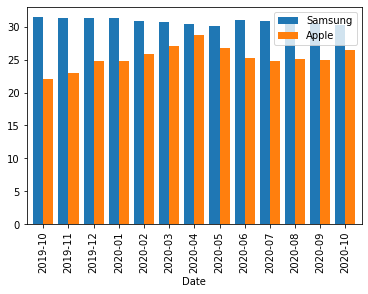

In [60]:
df.plot.bar(x='Date',y=['Samsung','Apple'],width = 0.8)

<AxesSubplot:ylabel='Date'>

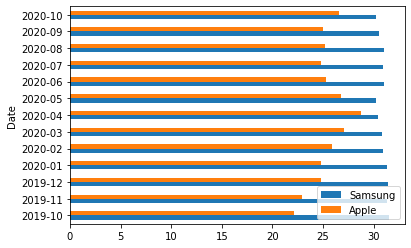

In [61]:
df.plot.barh(x='Date',y=['Samsung','Apple'],width = 0.5)

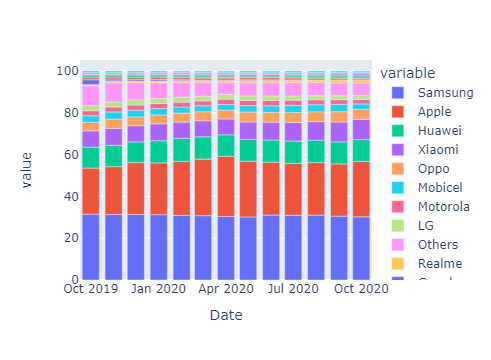

In [65]:
df.melt(id_vars= 'Date').plot.bar(backend = 'plotly',x='Date',y='value',color='variable')

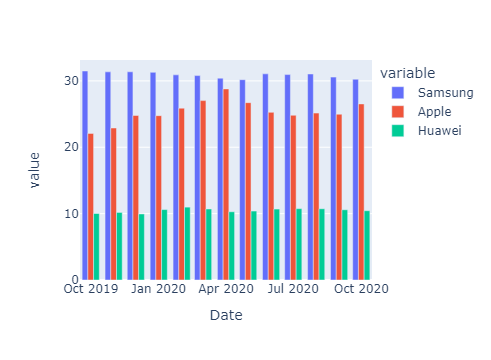

In [70]:
df.melt(id_vars= 'Date').query('variable == "Samsung" or variable == "Apple" or variable == "Huawei"')\
.plot.bar(backend= 'plotly',x='Date',y= 'value',color='variable',barmode = 'group')

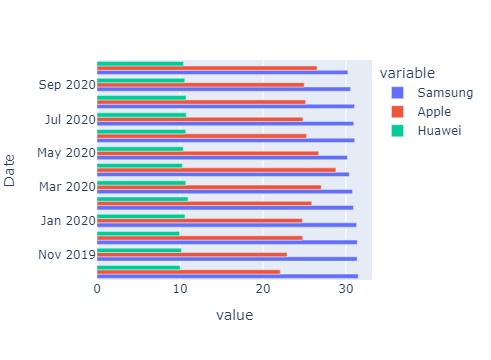

In [72]:
df.melt(id_vars= 'Date').query('variable == "Samsung" or variable == "Apple" or variable == "Huawei"')\
.plot.bar(backend = 'plotly',x='value',y='Date',color='variable',barmode='group')

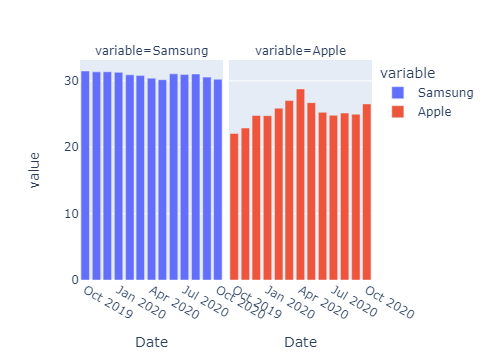

In [75]:
df.melt(id_vars = 'Date').query('variable == "Samsung" or variable == "Apple"')\
.plot.bar(backend = 'plotly',x='Date',y='value',color='variable',facet_col = 'variable')

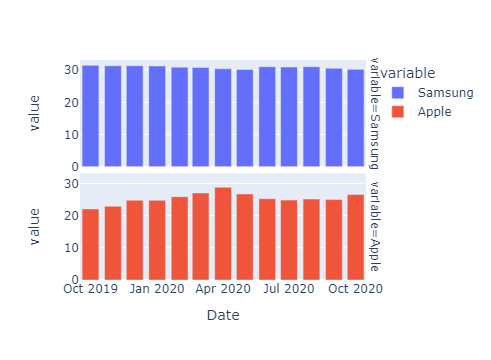

In [76]:
df.melt(id_vars = 'Date').query('variable == "Samsung" or variable == "Apple"')\
.plot.bar(backend = 'plotly',x='Date',y='value',color='variable',facet_row = 'variable')

In [77]:
import plotly.express as px 
df = px.data.tips() 
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

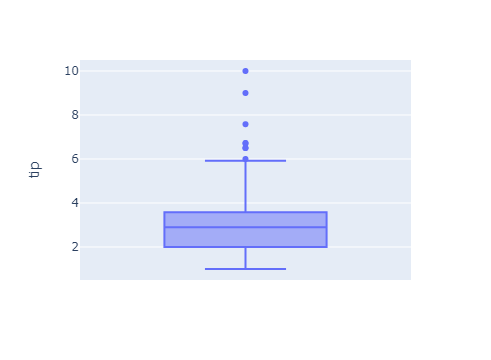

In [78]:
df.plot.box(backend = 'plotly',y='tip')

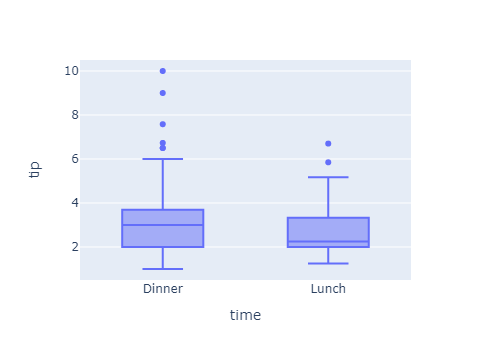

In [79]:
df.plot.box(backend = 'plotly',x = 'time',y= 'tip')

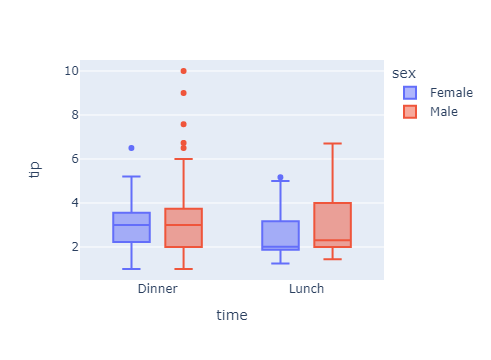

In [80]:
df.plot.box(backend='plotly',x='time',y='tip',color='sex')

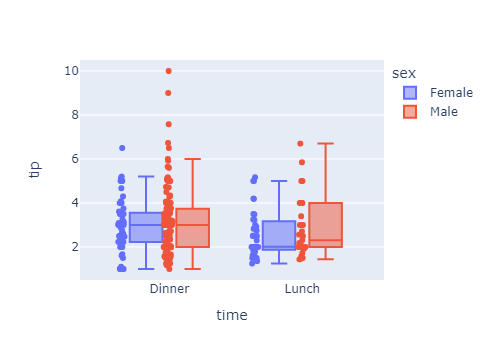

In [81]:
df.plot.box(backend='plotly',x='time',y='tip',color='sex',points ='all')

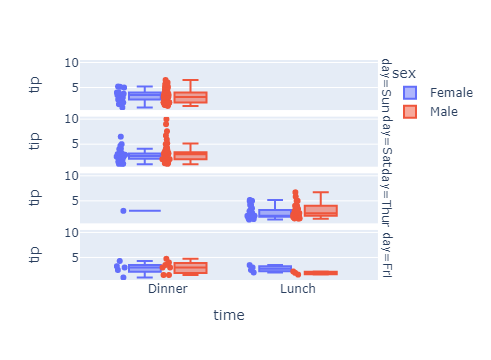

In [82]:
df.plot.box(backend='plotly',x='time',y='tip',color='sex',points='all',facet_row='day')

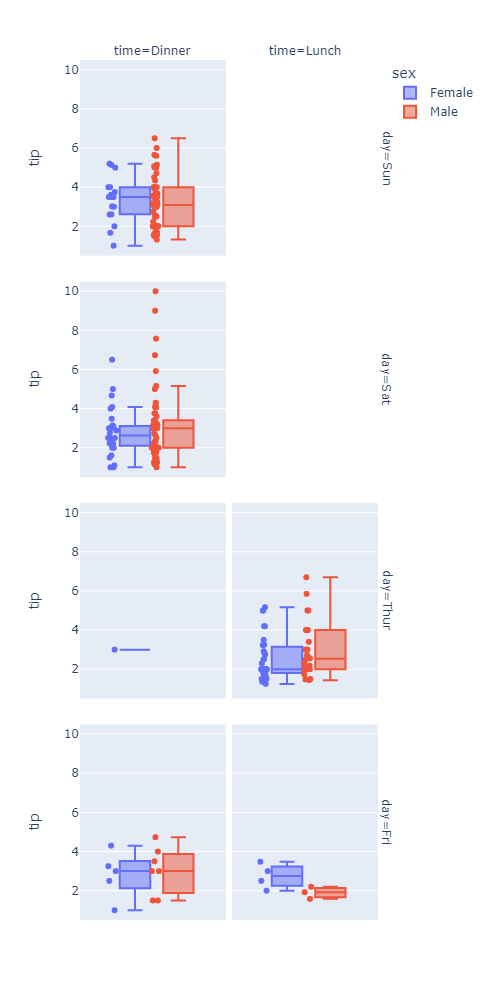

In [83]:
df.plot.box(backend='plotly',facet_col='time', facet_row='day',y='tip',color='sex',points='all',height=1000)

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0              1       5            4                       0   62506  ...   
1              5       3            3                       0  104437  ...   
2              5       5            3                       0   64955  ...   
3              1       5            3                       0   64991  ...   
4              5       5            3                       0   50825  ...   
..           ...     ...          ...                     ...     ...  ...   
306            1       5            3                       0   65893  ...   
307            5       5            1                       0   48513  ...   
308            1       3            4                       0  220450  ...   
309            1       3            3                       0   89292  ...   
310            1       5            3                       0   45046  ...   

        ManagerName  ManagerID  RecruitmentSource PerformanceScore  \
0    Michael Albert       22.0           LinkedIn          Exceeds   
1        Simon Roup        4.0             Indeed      Fully Meets   
2    Kissy Sullivan       20.0           LinkedIn      Fully Meets   
3      Elijiah Gray       16.0             Indeed      Fully Meets   
4    Webster Butler       39.0      Google Search      Fully Meets   
..              ...        ...                ...              ...   
306  Kissy Sullivan       20.0           LinkedIn      Fully Meets   
307  Brannon Miller       12.0      Google Search              PIP   
308      Janet King        2.0  Employee Referral          Exceeds   
309      Simon Roup        4.0  Employee Referral      Fully Meets   
310   David Stanley       14.0           LinkedIn      Fully Meets   

     EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0                4.60               5                    0   
1                4.96               3                    6   
2                3.02               3                    0   
3                4.84               5                    0   
4                5.00               4                    0   
..                ...             ...                  ...   
306              4.07               4                    0   
307              3.20               2                    0   
308              4.60               5                    6   
309              5.00               3                    5   
310              4.50               5                    0   

    LastPerformanceReview_Date DaysLateLast30 Absences  
0                    1/17/2019              0        1  
1                    2/24/2016              0       17  
2                    5/15/2012              0        3  
3                     1/3/2019              0       15  
4                     2/1/2016              0        2  
..                         ...            ...      ...  
306                  2/28/2019              0       13  
307                   9/2/2015              5        4  
308                  2/21/2019             

In [88]:
df.groupby('RaceDesc').agg({'Salary':['mean','count']}).melt(ignore_index = False).reset_index()

RaceDesc variable_0 variable_1         value
0   American Indian or Alaska Native     Salary       mean  65806.000000
1                              Asian     Salary       mean  68521.206897
2          Black or African American     Salary       mean  74431.025000
3                           Hispanic     Salary       mean  83667.000000
4                  Two or more races     Salary       mean  59998.181818
5                              White     Salary       mean  67287.545455
6   American Indian or Alaska Native     Salary      count      3.000000
7                              Asian     Salary      count     29.000000
8          Black or African American     Salary      count     80.000000
9                           Hispanic     Salary      count      1.000000
10                 Two or more races     Salary      count     11.000000
11                             White     Salary      count    187.000000

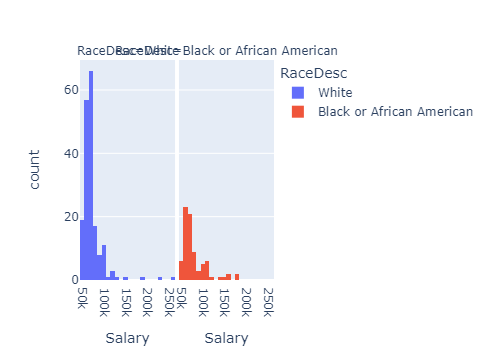

In [92]:
df.query('RaceDesc == "Black or African American" or RaceDesc == "White"')\
.plot.hist(backend='plotly',x='Salary',color='RaceDesc',facet_col='RaceDesc')

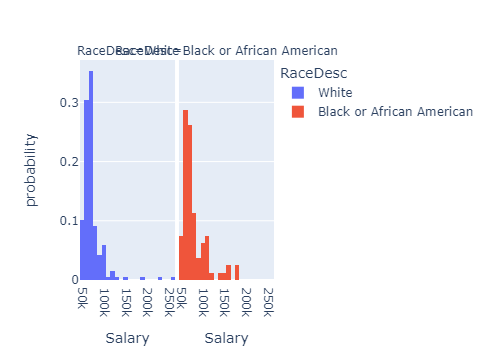

In [93]:
df.query('RaceDesc == "Black or African American" or RaceDesc == "White"')\
.plot.hist(backend='plotly',x='Salary',color='RaceDesc',facet_col='RaceDesc',histnorm = 'probability')

In [94]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

department result  gender  count
0           A   fail  female     19
1           A   fail    male    314
2           A   pass  female     89
3           A   pass    male    511
4           B   fail  female      7
5           B   fail    male    208
6           B   pass  female     18
7           B   pass    male    352
8           C   fail  female    391
9           C   fail    male    204
10          C   pass  female    202
11          C   pass    male    121
12          D   fail  female    244
13          D   fail    male    279
14          D   pass  female    131
15          D   pass    male    138
16          E   fail  female    299
17          E   fail    male    137
18          E   pass  female     94
19          E   pass    male     54
20          F   fail  female    103
21          F   fail    male    149
22          F   pass  female    238
23          F   pass    male    224

In [102]:
df.groupby(['gender']).agg({'count':'sum'}).reset_index().rename({'count':'count2'},axis = 1)

gender  count2
0  female    1835
1    male    2691

In [106]:
df.groupby(['gender','result']).agg({'count':'sum'}).reset_index().merge(df.groupby(['gender']).agg({'count':'sum'}).reset_index().rename({'count':'count2'},axis = 1)).eval('rate = count/count2').query('result == "pass"')

gender result  count  count2      rate
1  female   pass    772    1835  0.420708
3    male   pass   1400    2691  0.520253

In [107]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

department  gender  count2
0           A  female     108
1           A    male     825
2           B  female      25
3           B    male     560
4           C  female     593
5           C    male     325
6           D  female     375
7           D    male     417
8           E  female     393
9           E    male     191
10          F  female     341
11          F    male     373

In [111]:
df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)).eval('rate = count/count2')

department result  gender  count  count2      rate
0           A   fail  female     19     108  0.175926
1           A   pass  female     89     108  0.824074
2           A   fail    male    314     825  0.380606
3           A   pass    male    511     825  0.619394
4           B   fail  female      7      25  0.280000
5           B   pass  female     18      25  0.720000
6           B   fail    male    208     560  0.371429
7           B   pass    male    352     560  0.628571
8           C   fail  female    391     593  0.659359
9           C   pass  female    202     593  0.340641
10          C   fail    male    204     325  0.627692
11          C   pass    male    121     325  0.372308
12          D   fail  female    244     375  0.650667
13          D   pass  female    131     375  0.349333
14          D   fail    male    279     417  0.669065
15          D   pass    male    138     417  0.330935
16          E   fail  female    299     393  0.760814
17          E   pass  female     94     393  0.239186
18          E   fail    male    137     191  0.717277
19          E   pass    male     54     191  0.282723
20          F   fail  female    103     341  0.302053
21          F   pass  female    238     341  0.697947
22          F   fail    male    149     373  0.399464
23          F   pass    male    224     373  0.600536

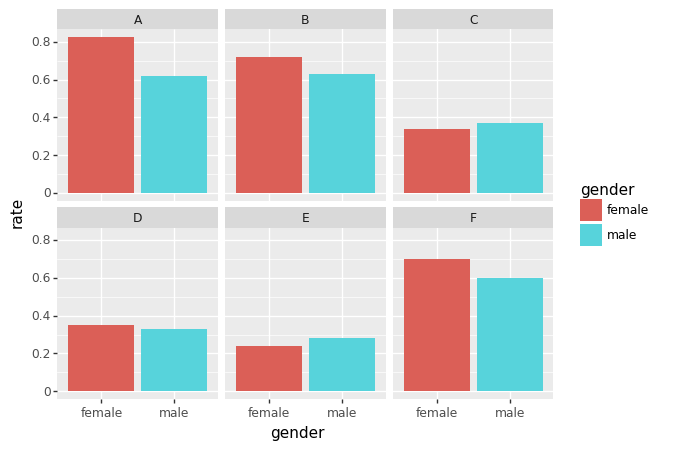

<ggplot: (169728922871)>

In [114]:
ggplot(df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)).eval('rate = count/count2').query('result== "pass"'))\
+ geom_col(aes(x='gender',y = 'rate' , fill = 'gender'))\
+ facet_wrap('department')

In [118]:
df.groupby(['department','gender']).agg({'count':'sum'}).reset_index()

department  gender  count
0           A  female    108
1           A    male    825
2           B  female     25
3           B    male    560
4           C  female    593
5           C    male    325
6           D  female    375
7           D    male    417
8           E  female    393
9           E    male    191
10          F  female    341
11          F    male    373

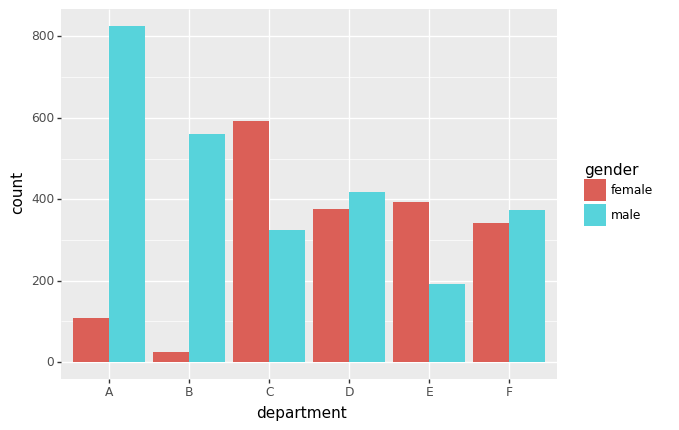

<ggplot: (169729204622)>

In [120]:
ggplot(df.groupby(['department','gender']).agg({'count':'sum'}).reset_index())\
+ geom_col(aes(x='department',y='count',fill= 'gender'),position = 'dodge')

In [121]:
df

department result  gender  count
0           A   fail  female     19
1           A   fail    male    314
2           A   pass  female     89
3           A   pass    male    511
4           B   fail  female      7
5           B   fail    male    208
6           B   pass  female     18
7           B   pass    male    352
8           C   fail  female    391
9           C   fail    male    204
10          C   pass  female    202
11          C   pass    male    121
12          D   fail  female    244
13          D   fail    male    279
14          D   pass  female    131
15          D   pass    male    138
16          E   fail  female    299
17          E   fail    male    137
18          E   pass  female     94
19          E   pass    male     54
20          F   fail  female    103
21          F   fail    male    149
22          F   pass  female    238
23          F   pass    male    224

In [123]:
df.groupby('gender').agg({'count':'sum'}).reset_index()

gender  count
0  female   1835
1    male   2691

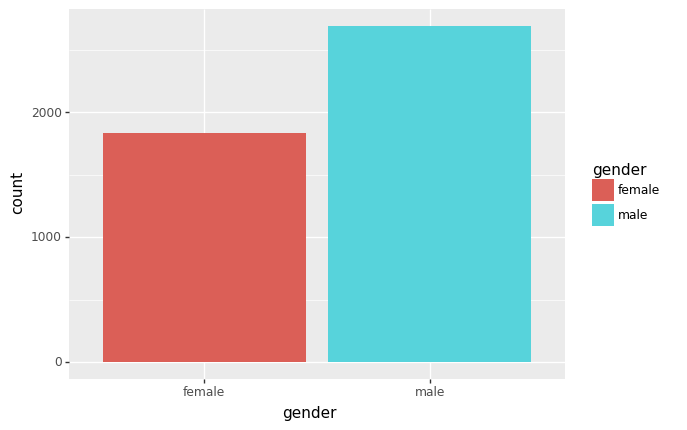

<ggplot: (169734564846)>

In [125]:
ggplot(df.groupby('gender').agg({'count':'sum'}).reset_index())\
+ geom_col(aes(x='gender',y='count',fill = 'gender'))

In [129]:
df

department result  gender  count
0           A   fail  female     19
1           A   fail    male    314
2           A   pass  female     89
3           A   pass    male    511
4           B   fail  female      7
5           B   fail    male    208
6           B   pass  female     18
7           B   pass    male    352
8           C   fail  female    391
9           C   fail    male    204
10          C   pass  female    202
11          C   pass    male    121
12          D   fail  female    244
13          D   fail    male    279
14          D   pass  female    131
15          D   pass    male    138
16          E   fail  female    299
17          E   fail    male    137
18          E   pass  female     94
19          E   pass    male     54
20          F   fail  female    103
21          F   fail    male    149
22          F   pass  female    238
23          F   pass    male    224

In [138]:
df.groupby('gender').agg({'count':'sum'}).reset_index().rename({'count':'count2'},axis= 1)

gender  count2
0  female    1835
1    male    2691

In [137]:
df.groupby(['gender','result']).agg({'count':'sum'}).reset_index()

gender result  count
0  female   fail   1063
1  female   pass    772
2    male   fail   1291
3    male   pass   1400

In [140]:
df.groupby(['gender','result']).agg({'count':'sum'}).reset_index().merge(df.groupby('gender').agg({'count':'sum'}).reset_index().rename({'count':'count2'},axis= 1)).query('result == "pass"').eval('rate = count/count2')

gender result  count  count2      rate
1  female   pass    772    1835  0.420708
3    male   pass   1400    2691  0.520253

In [142]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson2.csv")
df

department result  gender  count
0          A   fail  female      0
1          A   fail    male    100
2          A   pass  female      1
3          A   pass    male    900
4          B   fail  female    400
5          B   fail    male      1
6          B   pass  female    600
7          B   pass    male      1

In [146]:
df.groupby(['gender','department']).agg({'count':'sum'}).reset_index().rename({'count':'count2'},axis= 1)

gender department  count2
0  female          A       1
1  female          B    1000
2    male          A    1000
3    male          B       2

In [149]:
df.merge(df.groupby(['gender','department']).agg({'count':'sum'}).reset_index().rename({'count':'count2'},axis= 1)).eval('rate = count/count2').query('result == "pass"')

department result  gender  count  count2  rate
1          A   pass  female      1       1   1.0
3          A   pass    male    900    1000   0.9
5          B   pass  female    600    1000   0.6
7          B   pass    male      1       2   0.5